#Project Name: Used Cars Price Prediction using advanced Regression Techniques
The main aim of this project is to explore the dataset and discuss some interesting observations through visualizations and train machine learning models to fit and predict the prices of the used cars based on various features using supervised learning.


Dataset to downloaded from the below link
link here: https://www.kaggle.com/austinreese/craigslist-carstrucks-data

# Import required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')
import seaborn as sns
sns.set()

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
file_path = '/content/drive/MyDrive/UsedCarsDataset/CarsUSA.csv'

# Load Dataset

In [ ]:
Used_Cars_df = pd.read_csv(file_path)
print("Shape:",Used_Cars_df.shape)

#Viewing the top 5 records
Used_Cars_df.head(5)

Shape: (458213, 26)


,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,NaN,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,NaN,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


#About dataset

In [ ]:
Used_Cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

In [ ]:
Used_Cars_df.describe()

,Unnamed: 0,id,price,year,odometer,lat,long
count,458213.000000,4.582130e+05,4.582130e+05,457163.000000,4.029100e+05,450765.000000,450765.000000
mean,229106.000000,7.235233e+09,4.042093e+04,2010.746067,1.016698e+05,38.531925,-94.375824
std,132274.843786,4.594362e+06,8.194599e+06,8.868136,3.228623e+06,5.857378,18.076225
min,0.000000,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,-82.607549,-164.091797
25%,114553.000000,7.231953e+09,4.900000e+03,2008.000000,4.087700e+04,34.600000,-110.890427
50%,229106.000000,7.236409e+09,1.099500e+04,2013.000000,8.764100e+04,39.244500,-88.314889
75%,343659.000000,7.239321e+09,2.149500e+04,2016.000000,1.340000e+05,42.484503,-81.015022
max,458212.000000,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09,82.049255,150.898969


In [ ]:
#Categorical Features in  the dataset
categorical_features=[feature for feature in Used_Cars_df.columns if Used_Cars_df[feature].dtypes=='O']
print(categorical_features)

['url', 'region', 'region_url', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'image_url', 'description', 'state', 'posting_date']


In [ ]:
# Missing values
Missing_values = Used_Cars_df.isnull().sum()
Missing_values = pd.DataFrame(Missing_values,columns=['Missing Values'])
total_val = len(Used_Cars_df)
Missing_values['Missing percent']=Missing_values['Missing Values']/total_val
round(Missing_values*100,3).sort_values('Missing percent',ascending=False)

,Missing Values,Missing percent
size,32134800,70.131
condition,19294000,42.107
VIN,18754900,40.931
cylinders,17114000,37.349
paint_color,14084300,30.737
drive,13418800,29.285
type,11273800,24.604
odometer,5530300,12.069
manufacturer,1822000,3.976
long,744800,1.625


# Data Cleaning

## 1) Removing irrelevant columns:
The columns like Unnamed:0, id, url, image_url does not make any sense in the dataset. So, let's remove them from the dataset below.

In [ ]:
drop_columns = ['url','Unnamed: 0' ,'id','posting_date','image_url','description', 'region_url', 'VIN']
Used_Cars_df1 =  Used_Cars_df.drop(columns = drop_columns)

In [ ]:
Used_Cars_df1.head(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,NaN,other,NaN,al,32.590000,-85.480000
1,auburn,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,NaN,sedan,NaN,al,32.547500,-85.468200
2,auburn,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,SUV,blue,al,32.616807,-85.464149
3,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,al,32.861600,-85.216100
4,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,al,32.547500,-85.468200


## 2) Visualizing the relationship between missing values in independent features and price.

From the above dataframe, they are many missing values, we need to find the relationship between missing values and Price(dependent variable)
Let's plot some diagram for this relationship

In [ ]:
#Step-1: make the list of features which has missing values
features_with_missing_values=[features for features in Used_Cars_df1.columns if Used_Cars_df1[features].isnull().sum()>1]

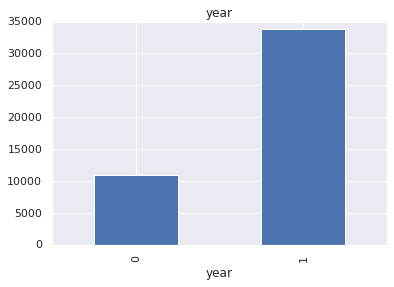

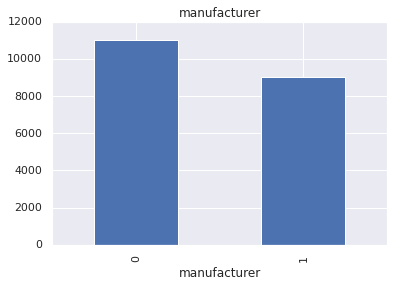

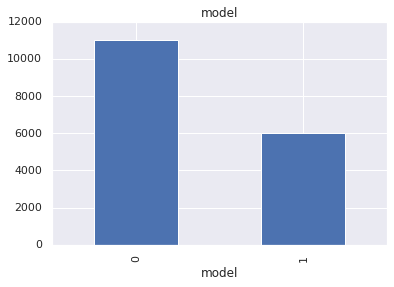

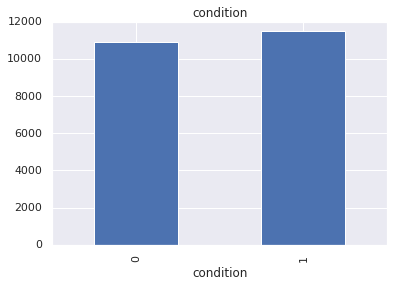

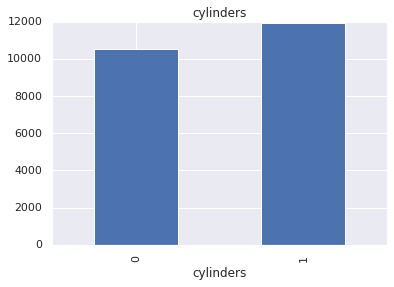

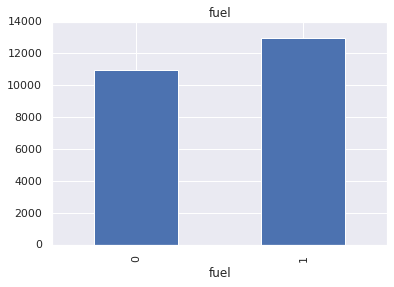

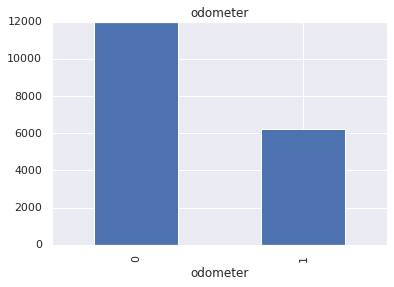

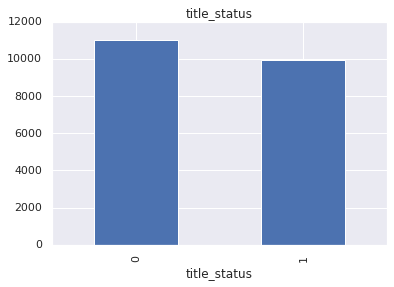

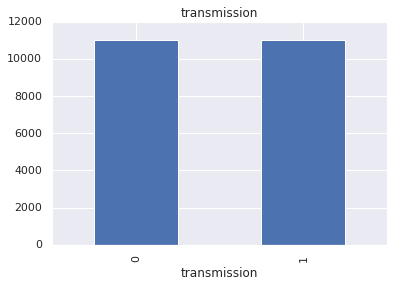

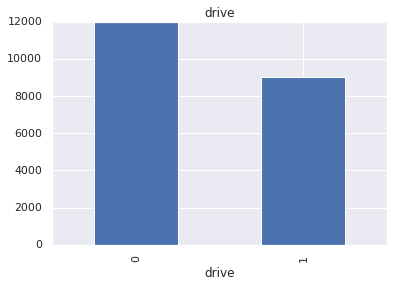

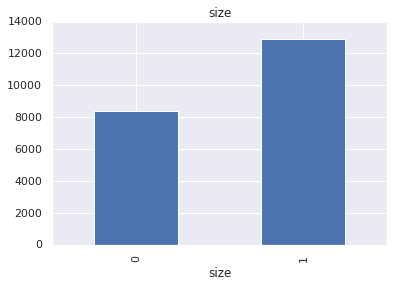

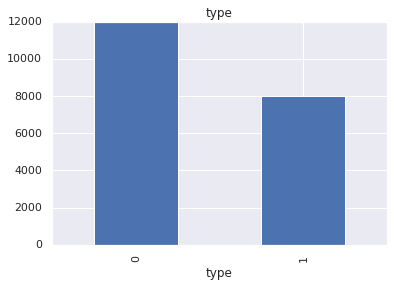

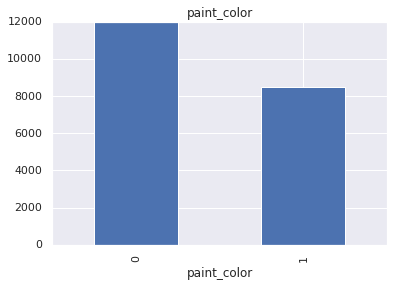

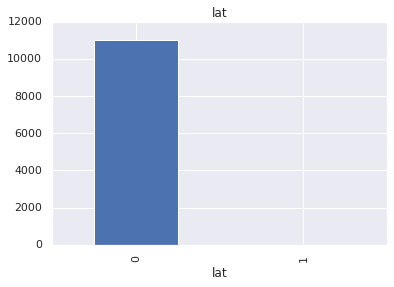

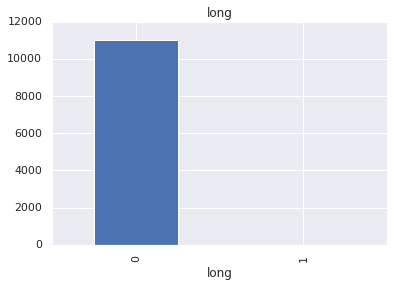

In [ ]:
#Step-2: let's see the relationship between price(dependent feature) and missing values from independent features.
for feature in features_with_missing_values:
    data = Used_Cars_df1.copy()
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the median price where the information is missing or present
    data.groupby(feature)['price'].median().plot.bar()
    plt.title(feature)
    plt.show();

## 3) Working on Numerical Variables

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in Used_Cars_df1.columns if Used_Cars_df1[feature].dtypes != 'O']

print('Number of numerical variables in the used cars dataset: ', len(numerical_features))

# let's see the numerical variables
Used_Cars_df1[numerical_features].head()

Number of numerical variables in the used cars dataset:  5


,price,year,odometer,lat,long
0,35990,2010.0,32742.0,32.590000,-85.480000
1,7500,2014.0,93600.0,32.547500,-85.468200
2,4900,2006.0,87046.0,32.616807,-85.464149
3,2000,1974.0,190000.0,32.861600,-85.216100
4,19500,2005.0,116000.0,32.547500,-85.468200


In [ ]:
Used_Cars_df1[numerical_features].describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,price,year,odometer,lat,long
count,458213.000000,457163.000000,402910.000000,450765.000000,450765.000000
mean,40420.930696,2010.746067,101669.756941,38.531925,-94.375824
std,8194598.603665,8.868136,3228622.544962,5.857378,18.076225
min,0.000000,1900.000000,0.000000,-82.607549,-164.091797
25%,4900.000000,2008.000000,40877.000000,34.600000,-110.890427
50%,10995.000000,2013.000000,87641.000000,39.244500,-88.314889
75%,21495.000000,2016.000000,134000.000000,42.484503,-81.015022
max,3615215112.000000,2021.000000,2043755555.000000,82.049255,150.898969


From above statistical analysis:

1. There are about **460,000** record in the dataset.
2. There are unreal prices for the cars in the dataset, the minimum price is **$0** and the maximum price is **3.6 billion dollars**. Since, nobody sells cars for free nor there is a car worth **3.6 billion**. The most expensive cars like: Bugatti, Pagani, Koenisegg, ferrari are worth millions not billions. These outliers must be removed from the price column.
4. The maximum odometer reading is  more than **2 billion miles**. No car runs billion miles. There are visible outliers in odometer column, which must be handled as well.



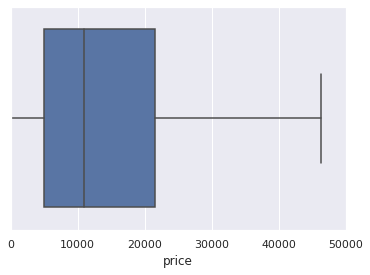

In [ ]:
sns.boxplot(Used_Cars_df1['price'],  data=Used_Cars_df1, showfliers=False)

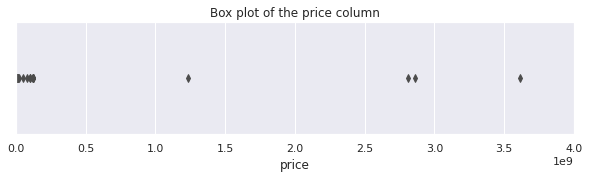

In [ ]:
fig, ax = plt.subplots(figsize=(10,2))
ax.set_title('Box plot of the price column')
sns.boxplot(x='price', data = Used_Cars_df1)

There are significantly larger values for the prices in the dataset. They are too large to fit in a normal box. We will remove them using interquartile range(IQR) method in Feature Engineering section.

### Correlation

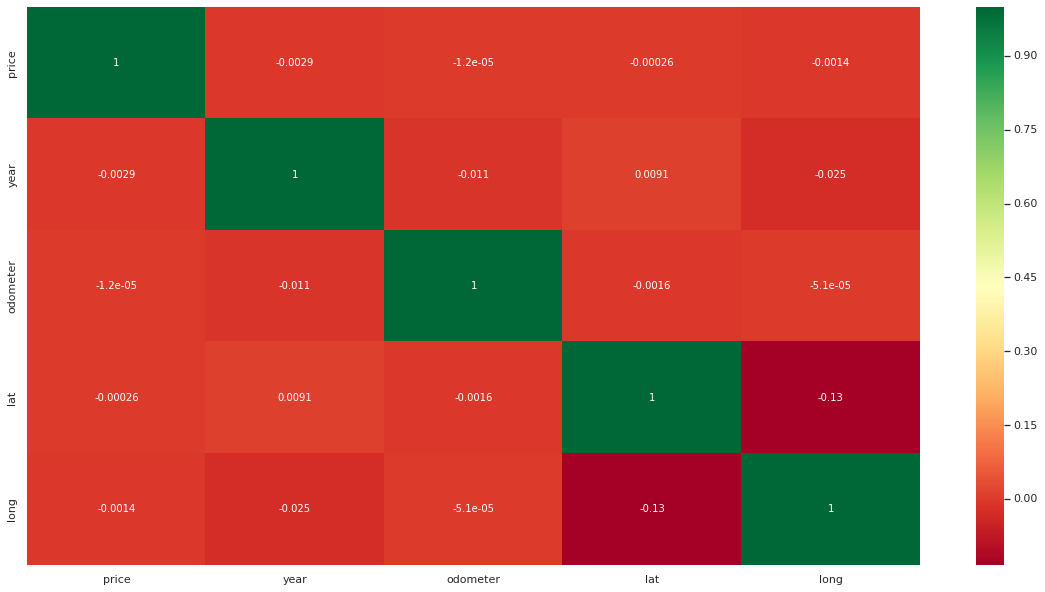

In [ ]:
#get correlations of each numerical features in dataset
corrmat = Used_Cars_df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))
#plot heat map
g=sns.heatmap(Used_Cars_df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Handling outliers

#### 1)Price Column

In [ ]:
#Since, there are too many outliers on price column, we are removing them using IQR method
Q1 = Used_Cars_df1['price'].quantile(0.25)
Q3 = Used_Cars_df1['price'].quantile(0.75)
IQR = Q3 - Q1
Outliers = (Used_Cars_df1['price'] >= Q1 - 1.5 * IQR) & (Used_Cars_df1['price'] <= Q3 + 1.5 *IQR)
Previous_size = Used_Cars_df1.count()['year']
Used_Cars_df2 = Used_Cars_df1.loc[Outliers]  
New_size = Used_Cars_df2.count()['year']
print(Previous_size-New_size,'(', '{:.2f}'.format(100*(Previous_size-New_size)/Previous_size), '%',')', 'outliers removed from the the price column')

12489 ( 2.73 % ) outliers removed from the the price column


Since, there are cars with 0 dollar on them. Let's handle these outliers by setting the minimum price to $500.

In [ ]:
Used_Cars_df2 = Used_Cars_df2[Used_Cars_df2['price']>500]

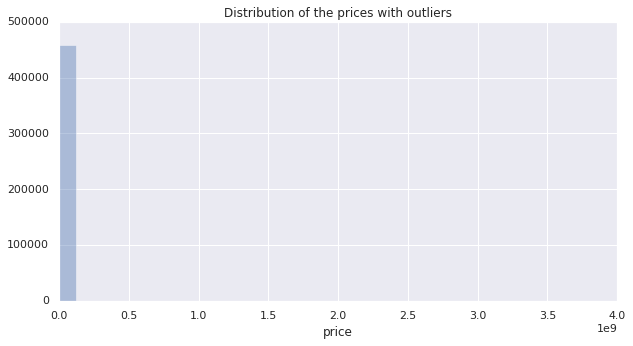

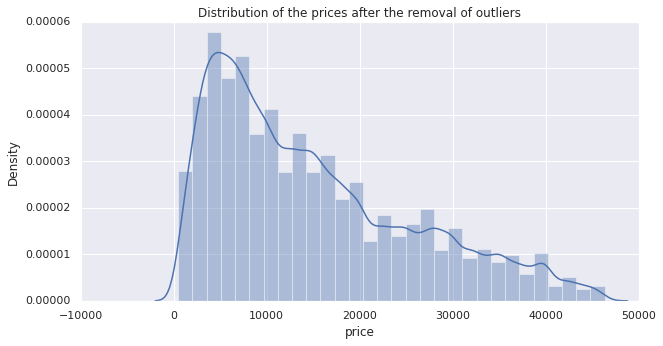

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Distribution of the prices with outliers')
sns.distplot(Used_Cars_df1['price'], bins=30, kde=False)


fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Distribution of the prices after the removal of outliers')
sns.distplot(Used_Cars_df2['price'], bins=30, kde=True)

#### 2) Odometer
There are outliers in the odometer column as well.

In [ ]:
#Since, there are too many outliers on odometer column, we are removing them using IQR method
Q1 = Used_Cars_df2['odometer'].quantile(0.25)
Q3 = Used_Cars_df2['odometer'].quantile(0.75)
IQR = Q3 - Q1
Outliers = (Used_Cars_df2['odometer'] >= Q1 - 1.5 * IQR) & (Used_Cars_df2['odometer'] <= Q3 + 1.5 *IQR)
Previous_size = Used_Cars_df2.count()['year']
Used_Cars_df3 = Used_Cars_df2.loc[Outliers]  
New_size = Used_Cars_df3.count()['year']
print(Previous_size-New_size,'(', '{:.2f}'.format(100*(Previous_size-New_size)/Previous_size), '%',')', 'outliers removed from the odometer column')

48563 ( 12.14 % ) outliers removed from the odometer column


In [ ]:
Used_Cars_df3.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,price,year,odometer,lat,long
count,352121.000000,351430.000000,352121.000000,349552.000000,349552.000000
mean,15533.684458,2011.003415,94972.028817,38.691690,-94.029684
std,10841.592760,7.697915,59737.848694,5.842170,17.949148
min,501.000000,1900.000000,0.000000,-81.702792,-164.091797
25%,6747.000000,2008.000000,44000.000000,34.920000,-107.897279
50%,12990.000000,2013.000000,91770.000000,39.467900,-87.947800
75%,22500.000000,2016.000000,137000.000000,42.551296,-80.875670
max,46350.000000,2021.000000,279277.000000,76.781734,150.898969


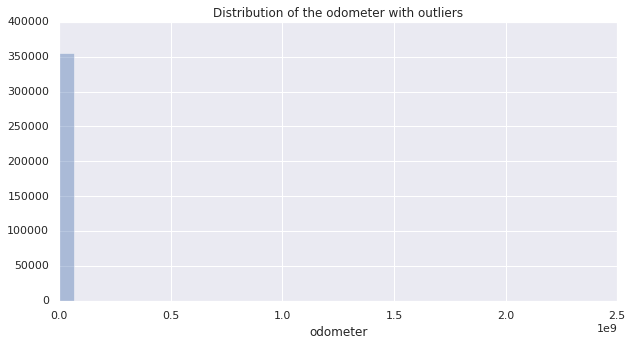

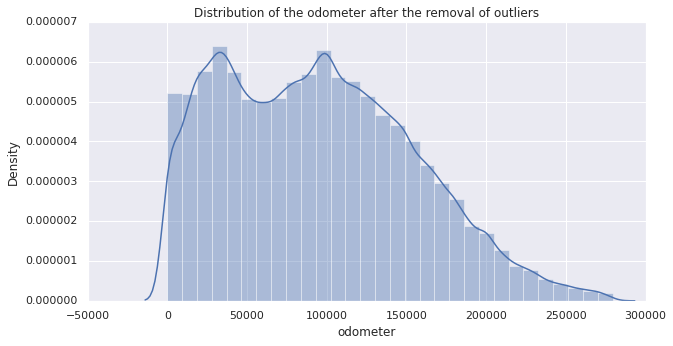

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Distribution of the odometer with outliers')
sns.distplot(Used_Cars_df2['odometer'], bins=30, kde=False)


fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Distribution of the odometer after the removal of outliers')
sns.distplot(Used_Cars_df3['odometer'], bins=30, kde=True)

### Lat Long column
From the correlation plot, lat and long do not significantly contribute for price. So, I am dropping them.

In [ ]:
Used_Cars_df4 = Used_Cars_df3.drop(['lat','long'], axis =1)
Used_Cars_df4.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,NaN,other,NaN,al
1,auburn,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,NaN,sedan,NaN,al
2,auburn,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,SUV,blue,al
3,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,al
4,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,al


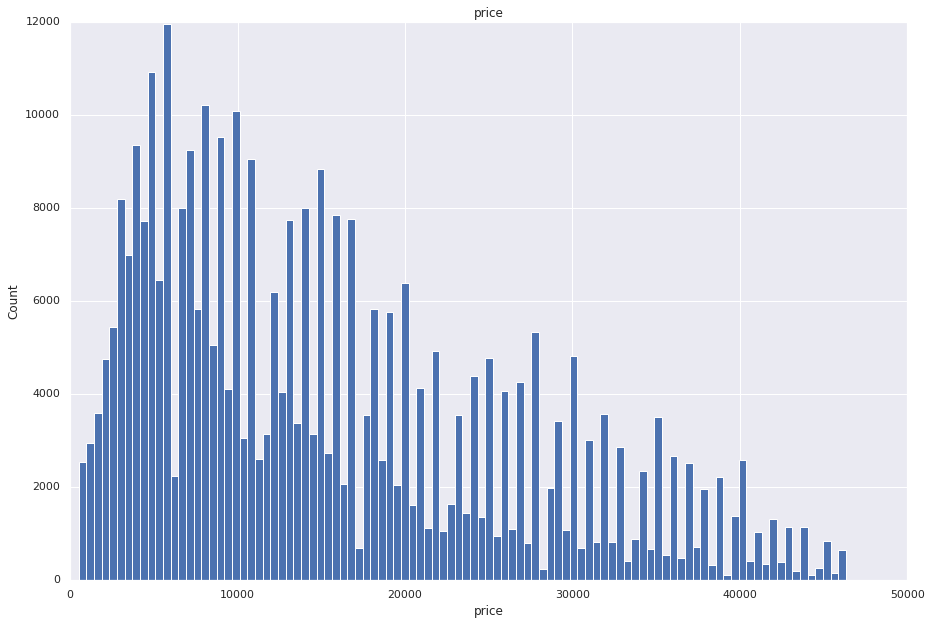

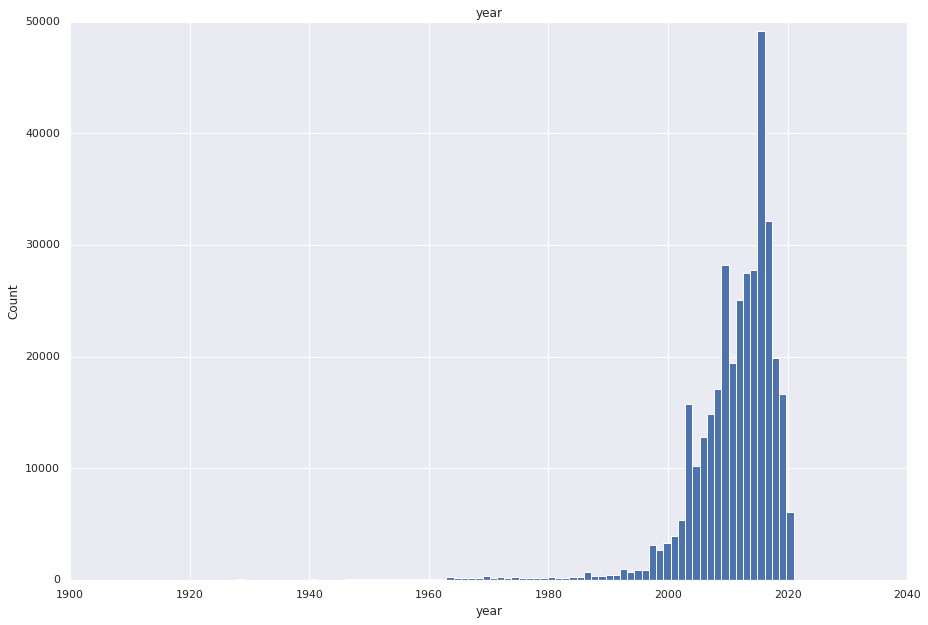

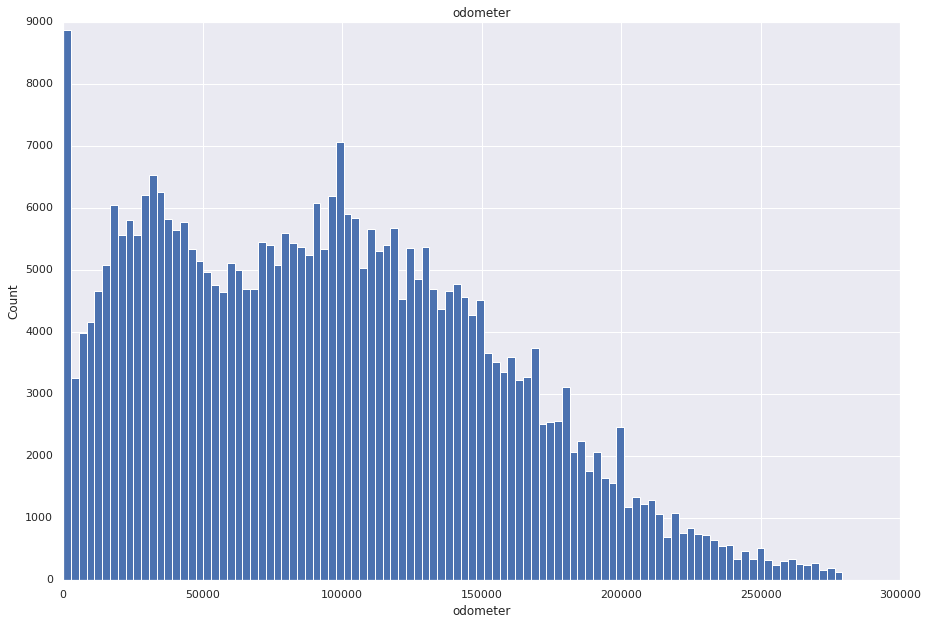

In [ ]:
## Lets analyse the numerical values by creating histograms to understand the distribution
numerical_features = [feature for feature in Used_Cars_df4.columns if Used_Cars_df4[feature].dtypes != 'O']
for feature in numerical_features:
    Used_Cars_df4[feature].hist(bins=100, figsize=(15,10))
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Handling DateTime Column

From the numerical features dataset, we have 1 year variable. We have extract information from the datetime variable. One example in this specific scenario can be relationship between the year cars were built and their price based on years built. We will be perform this analysis in the Feature Engineering in the second phase of the pipeline.



In [ ]:
# let's explore the content of these year variable
Used_Cars_df3['year'].value_counts()

2017.0    32160
2014.0    27756
2013.0    27476
2015.0    25134
2012.0    25029
          ...  
1924.0        3
1911.0        3
1925.0        2
1900.0        2
1913.0        1
Name: year, Length: 100, dtype: int64

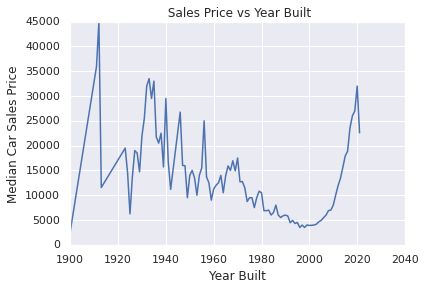

In [ ]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year car was built and the median price
Used_Cars_df3.groupby('year')['price'].median().plot()
plt.xlabel('Year Built')
plt.ylabel('Median Car Sales Price')
plt.title(" Sales Price vs Year Built")
plt.rcParams["figure.figsize"] = (20,10)

## 4) Working on Categorical Variables

In [ ]:
categorical_features=[feature for feature in Used_Cars_df4.columns if Used_Cars_df4[feature].dtypes=='O']
categorical_features

['region',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color',
 'state']

In [ ]:
Used_Cars_df4[categorical_features].head()

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
0,auburn,chevrolet,corvette grand sport,good,8 cylinders,gas,clean,other,rwd,NaN,other,NaN,al
1,auburn,hyundai,sonata,excellent,4 cylinders,gas,clean,automatic,fwd,NaN,sedan,NaN,al
2,auburn,bmw,x3 3.0i,good,6 cylinders,gas,clean,automatic,NaN,NaN,SUV,blue,al
3,auburn,chevrolet,c-10,good,4 cylinders,gas,clean,automatic,rwd,full-size,pickup,blue,al
4,auburn,ford,f350 lariat,excellent,8 cylinders,diesel,lien,automatic,4wd,full-size,pickup,blue,al


### EDA of categorical variable

In [ ]:
plt.figure(figsize=(15,6))
Used_Cars_df4['model'].value_counts()

f-150                            6086
silverado 1500                   4149
1500                             3136
camry                            3079
escape                           2792
                                 ... 
mazada 3 S                          1
MG Magnette ZB Varitone             1
yukon 1500                          1
silverado 2500hd classic            1
tundra 2wd truck 405-888-0568       1
Name: model, Length: 24828, dtype: int64

<Figure size 1080x432 with 0 Axes>

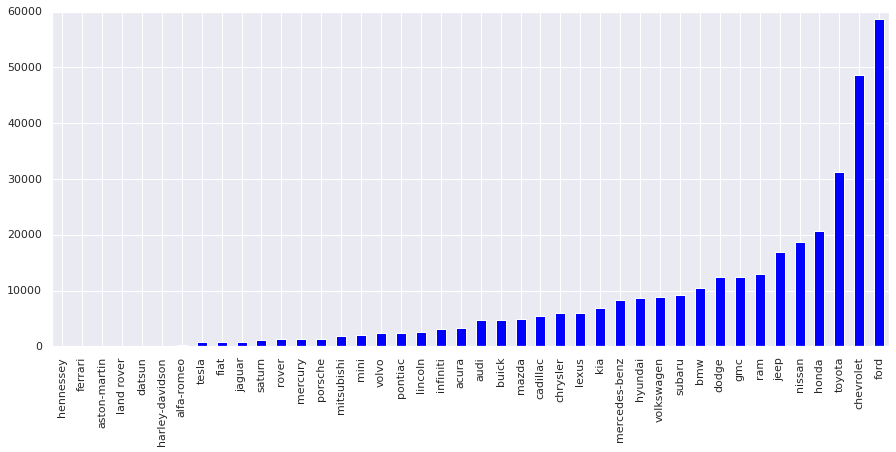

In [ ]:
plt.figure(figsize=(15,6))
Used_Cars_df4['manufacturer'].value_counts().sort_values().plot(kind = 'bar',color='blue')

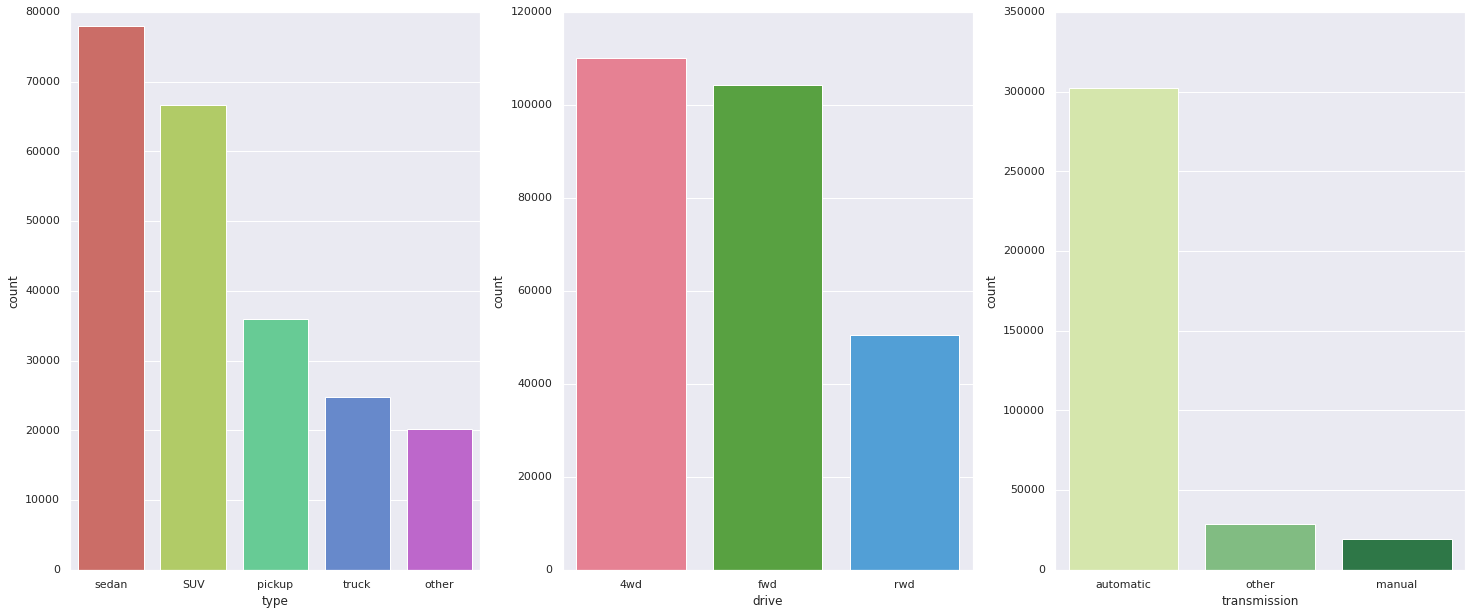

In [ ]:
df = Used_Cars_df4.copy()
fig, ax =plt.subplots(1,3,figsize=(25, 10))
sns.set(rc={"axes.facecolor":"#fcfcfc", "axes.grid":False,'xtick.labelsize':15,'ytick.labelsize':15})
sns.countplot(x ='type',data = df,order=df.type.value_counts().iloc[:5].index, ax = ax[0],palette="hls")
sns.countplot(x ='drive',data = df,order=df.drive.value_counts().iloc[:5].index, ax = ax[1],palette="husl")
sns.countplot(x ='transmission',data = df,order=df.transmission.value_counts().iloc[:5].index, ax = ax[2],palette="YlGn")
fig.show()

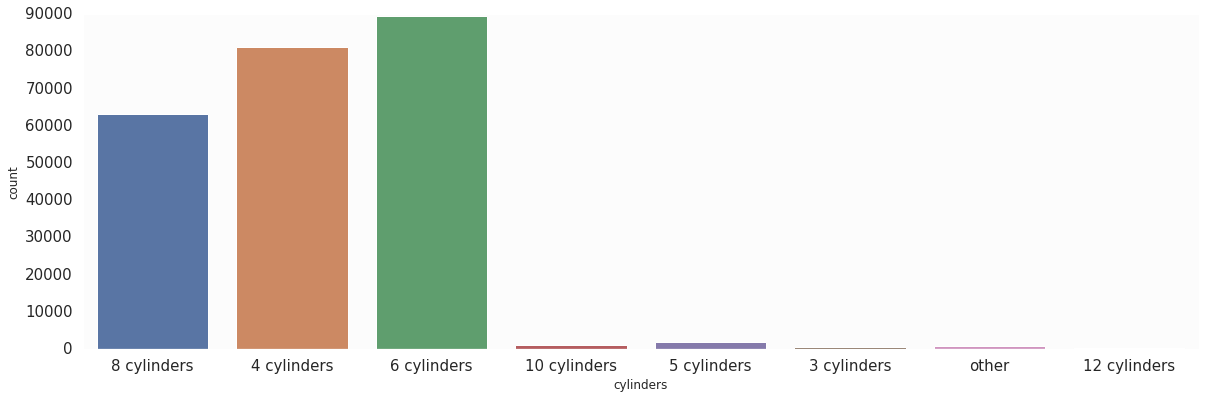

In [ ]:
plt.figure(figsize=(20,6))
ax = sns.countplot(x='cylinders',  data=Used_Cars_df4)
plt.show()

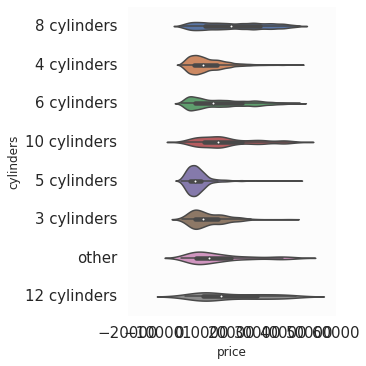

In [ ]:

sns.catplot(y="cylinders", x="price",kind = "violin", data=Used_Cars_df4)


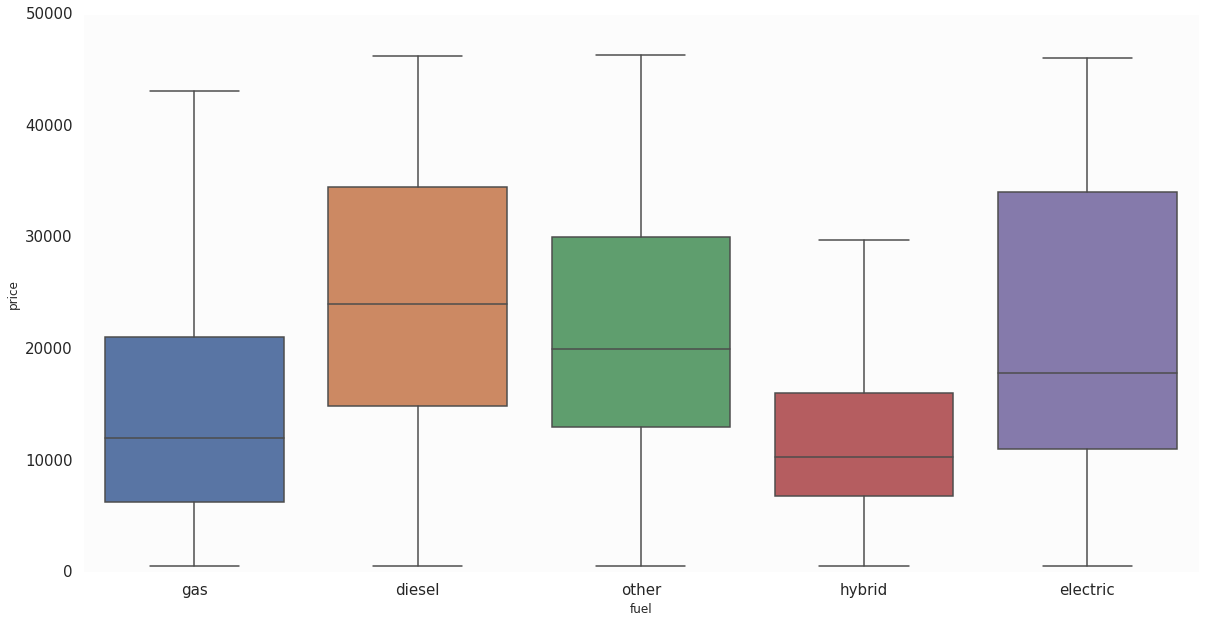

In [ ]:
sns.boxplot(y='price', x='fuel', data=Used_Cars_df4, showfliers=False)

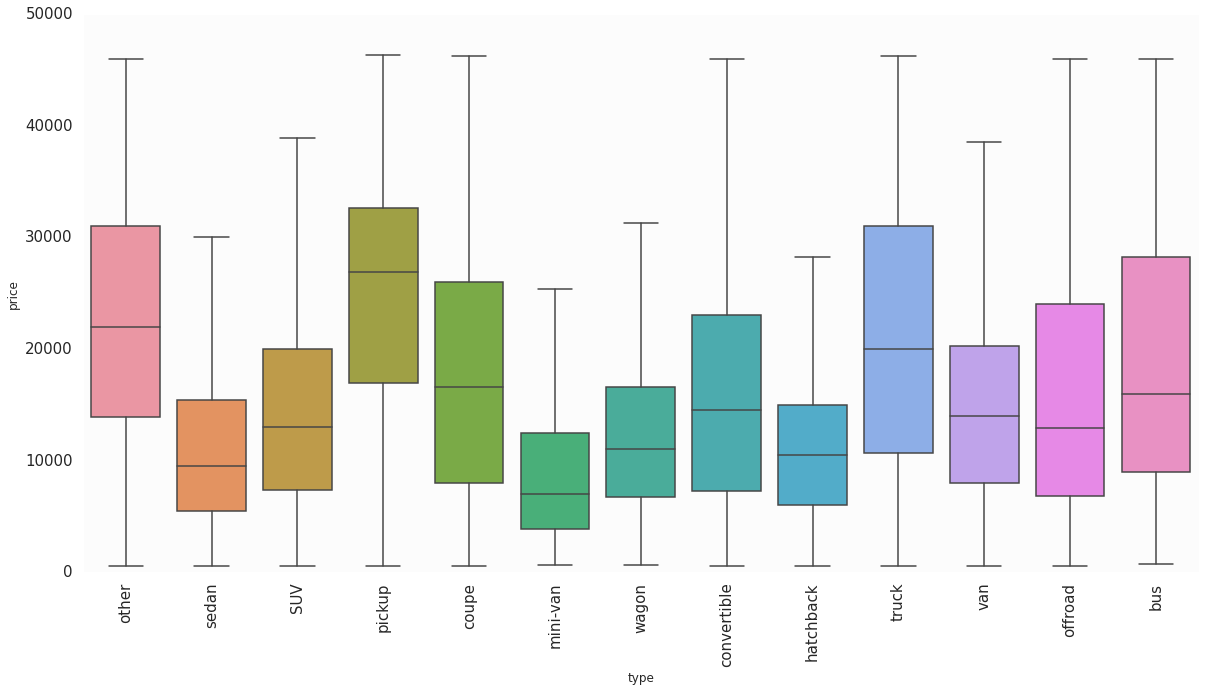

In [ ]:
plt.xticks(rotation=90)
sns.boxplot(y='price', x='type', data=Used_Cars_df4, showfliers=False)

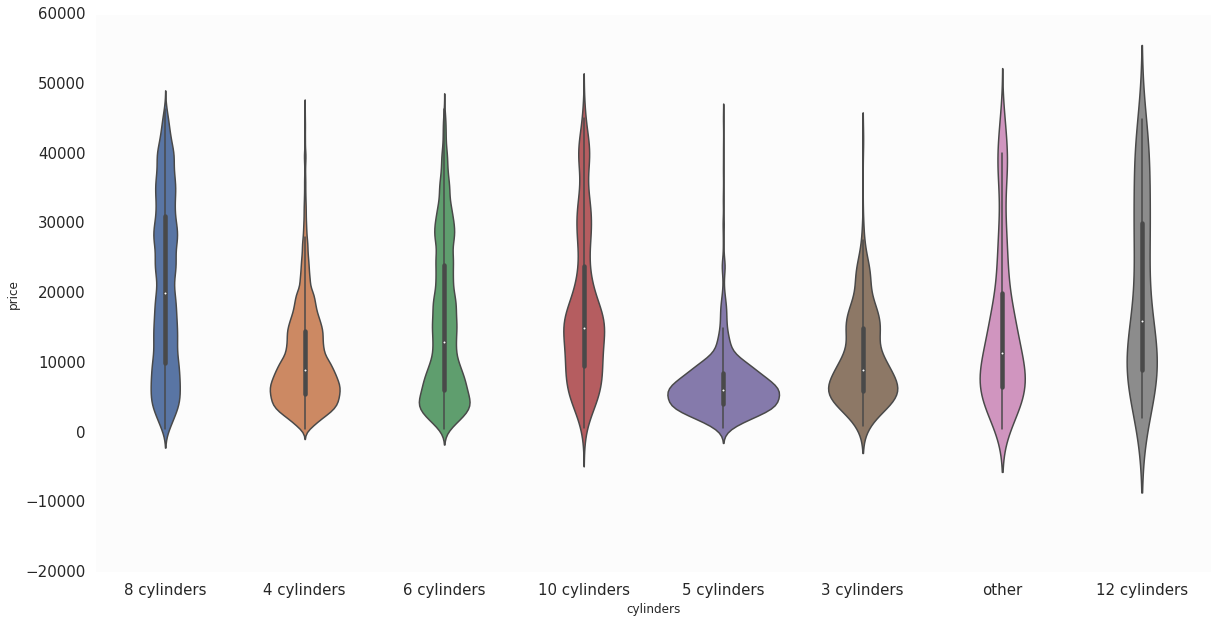

In [ ]:
sns.violinplot(x=Used_Cars_df4.cylinders, y=Used_Cars_df4.price)

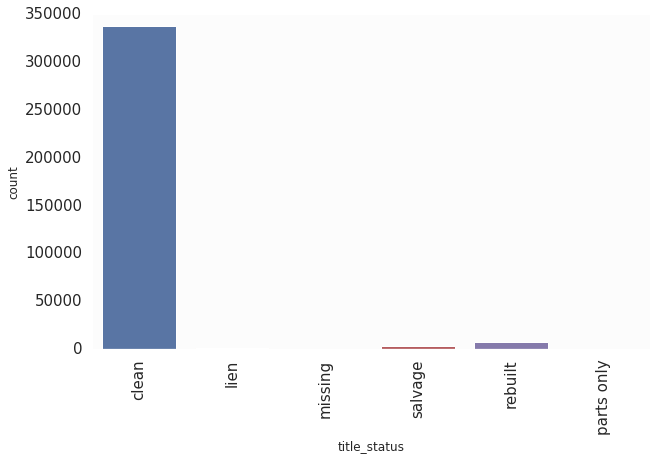

In [ ]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x='title_status', data=Used_Cars_df4)

## 5) Handling Missing Values
Since, outliers are already handled. We will handle the missing values.


In [ ]:
Missing_values = Used_Cars_df4.isnull().sum()
Missing_values = pd.DataFrame(Missing_values,columns=['Missing Values'])
total_val = len(Used_Cars_df4)
Missing_values['Missing percent']=Missing_values['Missing Values']/total_val
round(Missing_values*100,3).sort_values('Missing percent',ascending=False)

,Missing Values,Missing percent
size,24098700,68.439
condition,12915900,36.680
cylinders,11437800,32.483
drive,8718700,24.761
paint_color,8661400,24.598
type,6683100,18.980
manufacturer,1037000,2.945
model,247300,0.702
fuel,229100,0.651
title_status,161000,0.457


There are many missing values in our dataset, and  these missing values must be handled very carefully.
The following three actions must be performed:

1. The column 'size' has 68.439% data missing. That's a significant amount of missing values. So, we drop the entire 'size' column.
2. We remove the corresponding rows from the features that have very few missing values. i.e from "year", "manufacturer", "model", "fuel", "transmission", "drive", "type", "paint_color" features.
3. For features: "condition" and "cylinders", we  assign the missing values with another unique category called "null".

In [ ]:
Used_Cars_df5 = Used_Cars_df4.drop(columns = ['size'])
Used_Cars_df4.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,NaN,other,NaN,al
1,auburn,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,NaN,sedan,NaN,al
2,auburn,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,SUV,blue,al
3,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,al
4,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,al


In [ ]:
few_na_features = ['year', 'model', 'fuel', 'transmission', 'drive', 'type', 'paint_color','manufacturer', 'title_status']
for column in few_na_features:
    Used_Cars_df5 = Used_Cars_df5[~Used_Cars_df5[column].isnull()]

In [ ]:
## Replace missing value with a new label
many_na_features = ['condition', 'cylinders']
def replace_missing_values(Used_Cars_df5,few_na_features):
    data=Used_Cars_df5.copy()
    data[few_na_features]=data[few_na_features].fillna('Missing')
    return data

Used_Cars_df5=replace_missing_values(Used_Cars_df5,many_na_features)

Used_Cars_df5[many_na_features].isnull().sum()

condition    0
cylinders    0
dtype: int64

In [ ]:
Missing_values = Used_Cars_df5.isnull().sum()
Missing_values = pd.DataFrame(Missing_values,columns=['Missing Values'])
total_val = len(Used_Cars_df5)
Missing_values['Missing percent']=Missing_values['Missing Values']/total_val
round(Missing_values*100,3).sort_values('Missing percent',ascending=False)

,Missing Values,Missing percent
region,0,0.0
price,0,0.0
year,0,0.0
manufacturer,0,0.0
model,0,0.0
condition,0,0.0
cylinders,0,0.0
fuel,0,0.0
odometer,0,0.0
title_status,0,0.0


The state and region features do not contribute too much for the car price. So, we are dropping them from the dataset.

In [ ]:
clean_dataset = Used_Cars_df5.drop(['state','region'], axis =1)
clean_dataset.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
3,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,pickup,blue
4,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,pickup,blue
6,39990,2012.0,ford,mustang shelby gt500 coupe,good,8 cylinders,gas,9692.0,clean,other,rwd,coupe,blue
7,41990,2012.0,chevrolet,camaro zl1 coupe 2d,good,8 cylinders,gas,2778.0,clean,other,rwd,coupe,red
10,27500,2012.0,ford,f-250,excellent,Missing,diesel,189000.0,clean,automatic,4wd,pickup,silver


# Encoding Categorical Features
We have 10 categorical columns out of 13. 



*   condition and cylinders are ordinal features \
*   All other are nominal features




In [ ]:
#save csv file for deployment
data_to_save = clean_dataset.copy()
clean_dataset1 = clean_dataset.copy()

In [ ]:
cylinders_ordinal = {'3 cylinders':1,'4 cylinders':2,'5 cylinders':3,'6 cylinders':4,'8 cylinders':5,'10 cylinders':6,'12 cylinders':7,'Missing':8,'other':9}
condition_ordinal = {'salvage':1,'fair':2,'good':3,'excellent':4,'like new':5,'new':6,'Missing':7}

manufacturer_nominal = {val:i+1 for i,val in enumerate(sorted(clean_dataset1['manufacturer'].unique()))}
#model_nominal = {val:i+1 for i,val in enumerate(sorted(clean_dataset['model'].unique()))} -> Too many categories!
fuel_nominal = {val:i+1 for i,val in enumerate(sorted(clean_dataset1['fuel'].unique()))}
title_status_nominal = {val:i+1 for i,val in enumerate(sorted(clean_dataset1['title_status'].unique()))}
transmission_nominal = {val:i+1 for i,val in enumerate(sorted(clean_dataset1['transmission'].unique()))}
drive_nominal = {val:i+1 for i,val in enumerate(sorted(clean_dataset1['drive'].unique()))}
type_nominal = {val:i+1 for i,val in enumerate(sorted(clean_dataset1['type'].unique()))}
paint_color_nominal = {val:i+1 for i,val in enumerate(sorted(clean_dataset1['paint_color'].unique()))}

In [ ]:
clean_dataset1['cylinders'] = clean_dataset1['cylinders'].map(cylinders_ordinal).astype(int)
clean_dataset1['condition'] = clean_dataset1['condition'].map(condition_ordinal).astype(int)

clean_dataset1['manufacturer'] = clean_dataset1['manufacturer'].map(manufacturer_nominal)
#clean_dataset1['model'] = clean_dataset1['model'].map(model_count_replace)
clean_dataset1['fuel'] = clean_dataset1['fuel'].map(fuel_nominal)
clean_dataset1['title_status'] = clean_dataset1['title_status'].map(title_status_nominal)
clean_dataset1['transmission'] = clean_dataset1['transmission'].map(transmission_nominal)
clean_dataset1['drive'] = clean_dataset1['drive'].map(drive_nominal)
clean_dataset1['type'] = clean_dataset1['type'].map(type_nominal)
clean_dataset1['paint_color'] = clean_dataset1['paint_color'].map(paint_color_nominal)

In [ ]:
clean_dataset1.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
3,2000,1974.0,8,c-10,3,2,3,190000.0,1,1,3,9,2
4,19500,2005.0,14,f350 lariat,4,5,1,116000.0,2,1,1,9,2
6,39990,2012.0,14,mustang shelby gt500 coupe,3,5,3,9692.0,1,3,3,4,2
7,41990,2012.0,8,camaro zl1 coupe 2d,3,5,3,2778.0,1,3,3,4,9
10,27500,2012.0,14,f-250,4,8,1,189000.0,1,1,1,9,10


model feature has too many categories, so we will drop this feature

# Normalization or Standardization
* Normalization is good to use when we know that the distribution of data does not follow a Gaussian distribution.

* Standardization, can be helpful in cases where the data follows a Gaussian distribution.

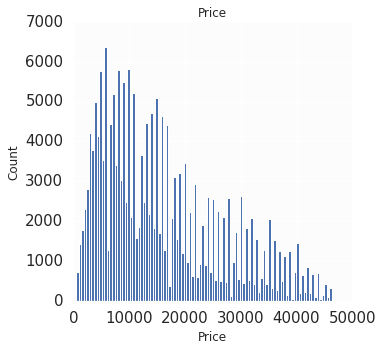

In [ ]:
clean_dataset1['price'].hist(bins=100, figsize=(5,5))
plt.xlabel('Price')
plt.ylabel("Count")
plt.title('Price')
plt.show()

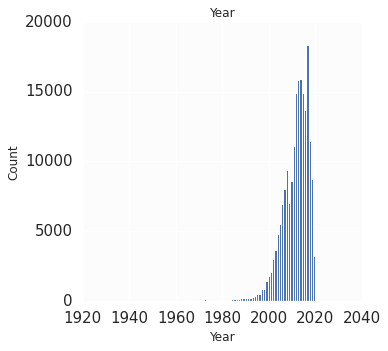

In [ ]:
clean_dataset1['year'].hist(bins=100, figsize=(5,5))
plt.xlabel('Year')
plt.ylabel("Count")
plt.title('Year')
plt.show()

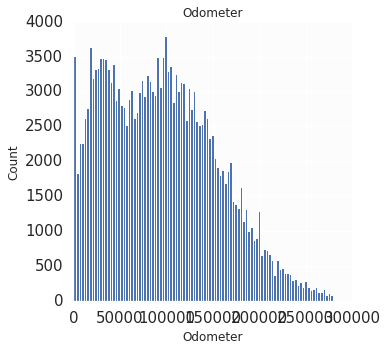

In [ ]:
clean_dataset1['odometer'].hist(bins=100, figsize=(5,5))
plt.xlabel('Odometer')
plt.ylabel("Count")
plt.title('Odometer')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
std_scaler = MinMaxScaler()

for feature in ['year', 'odometer','price']:
    clean_dataset1[feature] = std_scaler.fit_transform(clean_dataset1[feature].values.reshape(-1,1))

**Feature Selection**

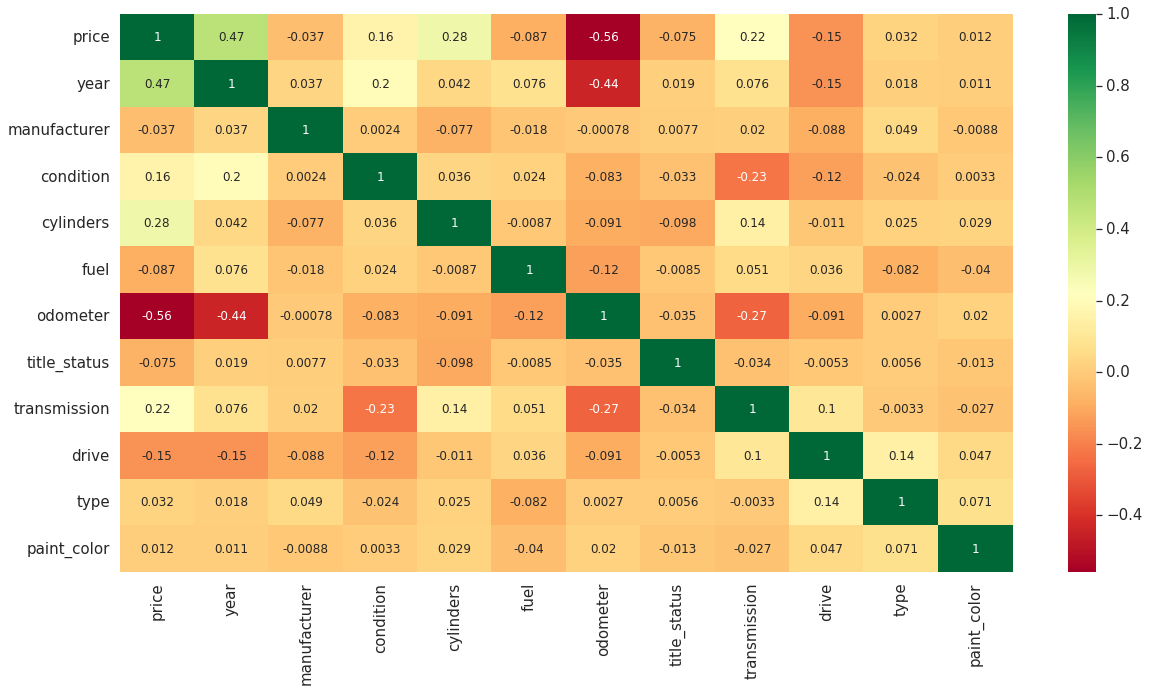

In [ ]:
#get correlations using heat map
corrmat = clean_dataset1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))
#plot heat map
g=sns.heatmap(clean_dataset1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#ML Models

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
data = clean_dataset1.copy()

In [ ]:
Accuracy = {}

## Splitting the Data into Training and Testing Set 

In [ ]:
y = data['price']
X = data.drop(['price','model'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(157358, 11) (157358,)
(39340, 11) (39340,)


## 1) Linear regression

In [ ]:
#2. Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [ ]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print('R2 Score:',lin_reg.score(X_test,y_test)*100)
Accuracy['Linear Regression'] = lin_reg.score(X_test,y_test)*100

Mean Absolute Error: 0.13
Mean Squared Error: 0.03
Root Mean Squared Error: 0.17
R2 Score: 48.84108317756934


##2) **KNN Regressor**




In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=4)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [ ]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print('R2 Score:',knn_model.score(X_test,y_test)*100)
Accuracy['KNN Regressor'] = knn_model.score(X_test,y_test)*100

Mean Absolute Error: 0.06
Mean Squared Error: 0.01
Root Mean Squared Error: 0.11
R2 Score: 79.8887493019306


### Hyperparameter tuning (KNN model)
We use GridSearchCV() to find the best number of neighbors via cross validation.

In [ ]:
KNN_Reg = KNeighborsRegressor()
param_grid = [
     {
         'weights':['uniform'],
         'n_neighbors':[i for i in range(1,9)]
     }]

grid_search_KNN = GridSearchCV(KNN_Reg, param_grid,n_jobs=-1,verbose=2)
grid_search_KNN.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done   3 out of  40 | elapsed:    8.6s remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  24 out of  40 | elapsed:   10.0s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   10.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8],
                          'weights': ['uniform']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [ ]:
KNN_best_val = grid_search_KNN.best_estimator_
KNN_best_val

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [ ]:
y_Pred = grid_search_KNN.predict(X_test)

In [ ]:
print('R2 Score:',grid_search_KNN.score(X_test,y_test)*100)

R2 Score: 81.14921592437683


## 2) Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
Dt_model = DecisionTreeRegressor()
Dt_model.fit(X_train, y_train)
y_pred = Dt_model.predict(X_test)

In [ ]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print(Dt_model.score(X_test,y_test)*100)
Accuracy['Decision Tree'] = Dt_model.score(X_test,y_test)*100

Mean Absolute Error: 0.04
Mean Squared Error: 0.01
Root Mean Squared Error: 0.08
86.91835476295986


###Hyperparameter Tuning(Decision Trees)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
  
# Creating the hyperparameter grid 
param_dist = {"max_depth": [3,4,5,6,7,8,9,10],
              "max_features":["auto","log2","sqrt",None],
              "min_samples_leaf": randint(5, 15),
               "splitter":["best","random"],
               "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]}
  
# Instantiating Decision Tree classifier
Dec_tree = DecisionTreeRegressor()
  
# Instantiating RandomizedSearchCV object
Dec_tree_cv = RandomizedSearchCV(Dec_tree, param_dist, cv = 5)
  
Dec_tree_cv.fit(X_train, y_train)
y_pred = Dec_tree_cv.predict(X_test)
print(Dec_tree_cv.score(X_test,y_test)*100)


In [ ]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(Dec_tree_cv.best_params_))
print("Best score is {}".format(Dec_tree_cv.best_score_))

## 3) RF Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

Random_regressor = RandomForestRegressor(random_state=0, n_estimators =5)
Random_regressor.fit(X_train, y_train)
y_pred = Random_regressor.predict(X_test)

In [ ]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print('R2 Score:',Random_regressor.score(X_test,y_test)*100)
Accuracy['Random Forest'] = Random_regressor.score(X_test,y_test)*100

Mean Absolute Error: 0.04
Mean Squared Error: 0.0
Root Mean Squared Error: 0.07
R2 Score: 91.05677991165342


In [ ]:
#Parameters used by our current Random Forest Model
print('Parameters currently in use by our random forest model \n')
print(Random_regressor.get_params())

Parameters currently in use by our random forest model 

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 5, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


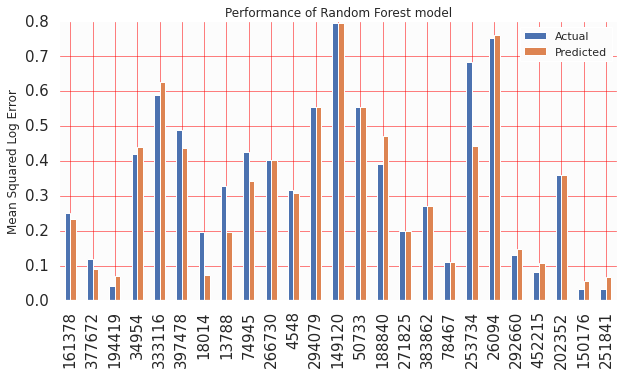

In [ ]:
check_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
check_results_df = check_results_df.head(25)
check_results_df.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.title('Performance of Random Forest model')
plt.ylabel('Mean Squared Log Error')
plt.savefig('Random-Forest-Model-Performance.jpg')
plt.show()

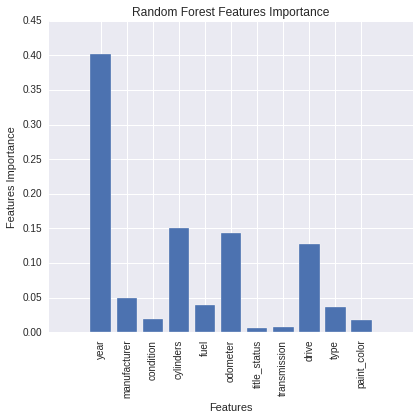

In [ ]:
features_importance = Random_regressor.feature_importances_
features = X_train.columns

# Set the style
plt.style.use('seaborn')

# list of x locations for plotting
x_values = list(range(len(features_importance)))

# Make a bar chart
plt.figure(figsize=(6,6))
plt.bar(x_values, features_importance, orientation = ('vertical'))

# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))

# Axis labels and title
plt.ylabel('Features Importance'); 
plt.xlabel('Features'); 
plt.title('Random Forest Features Importance')
plt.tight_layout()
plt.savefig('Random-Forest-Feature-Importance.jpg',dpi=600)
plt.show()

###**Hyperparameter tuning**

In [ ]:
parameters ={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
     'max_features': ['auto','sqrt','log2'],
     'min_samples_leaf': [3,5,7,10,15,20],
     'min_samples_split': [2,5,10,15,20,25],
     'n_estimators': [200,250,300,350,400,450,500]}
from sklearn.model_selection import ParameterGrid
param_size = ParameterGrid(parameters)
len(param_size)

7560

1. n_estimators = number of trees in the foreset
2. max_features = max number of features considered for splitting a node
3. max_depth = max number of levels in each decision tree
4. min_samples_split = min number of data points placed in a node before the node is split
5. min_samples_leaf = min number of data points allowed in a leaf node
6. bootstrap = method for sampling data points (with or without replacement)



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomForestRegressor(random_state=0)
random_search = RandomizedSearchCV(
    estimator = random_search, 
    param_distributions=parameters, 
    cv=5,
    random_state = 42,
    n_jobs=-1)

random_result= random_search.fit(X_train, y_train)
print('Best Params: ', random_result.best_params_)
print('Best Score: ', random_result.best_score_)

In [ ]:
print('R2 Score after hyper parameter tuning:',random_result.score(X_test,y_test)*100)

## 4)XGBoost

In [ ]:
from xgboost import XGBRegressor
xg_model = XGBRegressor()
xg_model.fit(X_train, y_train)
y_pred = xg_model.predict(X_test)

In [ ]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print('R2 Score,',xg_model.score(X_test,y_test)*100)
Accuracy['XGBoost'] = xg_model.score(X_test,y_test)*100

In [ ]:
#Feature Importance
import xgboost as xgb
xgb.plot_importance(xg_model)
plt.rcParams['figure.figsize'] = [8, 8]
plt.tight_layout()
plt.savefig('XGBoost-Model-Features-Importance.jpg')
plt.show();

##**5) AdaBoost Model**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
AdaBoost_Regressor= AdaBoostRegressor(DecisionTreeRegressor())

AdaBoost_Regressor.fit(X_train, y_train)
y_pred_AB = AdaBoost_Regressor.predict(X_test)

In [ ]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred_AB),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred_AB),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_AB)),2))
print('R2 Score,',AdaBoost_Regressor.score(X_test,y_test)*100)
Accuracy['AdaBoost_Regressor'] = AdaBoost_Regressor.score(X_test,y_test)*100

Mean Absolute Error: 0.03
Mean Squared Error: 0.0
Root Mean Squared Error: 0.07
R2 Score, 92.22335242941917


**Features Importance**

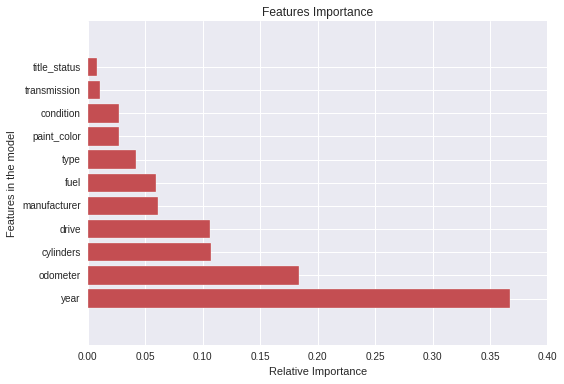

In [ ]:
features_importance=AdaBoost_Regressor.feature_importances_
features=X_train.columns

indices = np.argsort(features_importance)
indices = [i for i in reversed(indices)]
plt.figure(1)
plt.title('Features Importance')
plt.barh(range(len(indices)), features_importance[indices], color='r', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features in the model')
plt.tight_layout()
plt.savefig('Adaboost-Features-Importance.jpg',dpi=60)
plt.show();

Hyperparameter Tuning AdaBoost Regressor

In [ ]:
param_dist = {
 'n_estimators': [150,200,250,300,350,400],
 'learning_rate' : [0.01,0.05,0.1,0.3,0.6,0.9,1],
 'loss' : ['linear', 'square', 'exponential']
 }

AdaBoost_Regressor_hyp_tun = RandomizedSearchCV(AdaBoostRegressor(DecisionTreeRegressor()),
 param_distributions = param_dist,
 cv=3,
 n_iter = 10,
 n_jobs=-1)

AB_hyp_tun_result = AdaBoost_Regressor_hyp_tun.fit(X_train, y_train)
print('Best Params: ', AB_hyp_tun_result.best_params_)
print('Best Score: ', AB_hyp_tun_result.best_score_)

Best Params:  {'n_estimators': 150, 'loss': 'exponential', 'learning_rate': 0.3}
Best Score:  0.9209563489936352


In [ ]:
print('R2 Score,',AB_hyp_tun_result.score(X_test,y_test)*100)

R2 Score, 92.84830643680941


## Model Accuracy

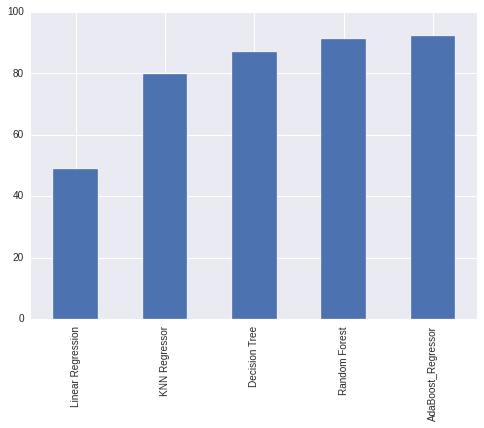

In [ ]:
viz = pd.Series(Accuracy,index=Accuracy.keys())
ax = viz.plot.bar()

# Dumping the Files

In [ ]:
import pickle
# Creating a pickle file for the tuned AdaBoost Regressor model
filename = 'AdaBoost_Regressor_Tuned_Model.pkl'
pickle.dump(AdaBoost_Regressor_hyp_tun, open(filename, 'wb'))

In [ ]:
# Creating a pickle file to dump std_scaler model
filename = 'Scaler.pkl'
pickle.dump(std_scaler, open(filename, 'wb'))